<h1>4.1 「課題１」「課題２」に対する分析過程</h1>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

In [77]:
ssdse_a = pd.read_csv('new_city_data.csv')
pd.set_option('display.max_columns', 500) 

In [78]:
print("shape of ssde_a :",ssdse_a.shape)
ssdse_a.head()

shape of ssde_a : (1741, 128)


,地域コード,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,15歳未満人口（女）,15～64歳人口,15～64歳人口（男）,15～64歳人口（女）,65歳以上人口,65歳以上人口（男）,65歳以上人口（女）,75歳以上人口,75歳以上人口（男）,75歳以上人口（女）,外国人人口,出生数,死亡数,転入者数（日本人移動者）,転出者数（日本人移動者）,世帯数,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,65歳以上の世帯員のいる核家族世帯数,高齢夫婦のみの世帯数,高齢単身世帯数（65歳以上の者１人）,婚姻件数,離婚件数,総面積（北方地域及び竹島を除く）,可住地面積,事業所数,事業所数（農業，林業）,事業所数（建設業）,事業所数（製造業）,事業所数（電気・ガス・熱供給・水道業）,事業所数（情報通信業）,事業所数（運輸業，郵便業）,事業所数（卸売業，小売業）,事業所数（金融業，保険業）,事業所数（不動産業，物品賃貸業）,事業所数（学術研究，専門・技術サービス業）,事業所数（宿泊業，飲食サービス業）,事業所数（生活関連サービス業，娯楽業）,事業所数（教育，学習支援業）,事業所数（医療，福祉）,事業所数（複合サービス事業）,事業所数（サービス業（他に分類されないもの））,事業所数（公務（他に分類されるものを除く））,第１次産業事業所数,第２次産業事業所数,第３次産業事業所数,従業者数,従業者数（農業，林業）,従業者数（建設業）,従業者数（製造業）,従業者数（電気・ガス・熱供給・水道業）,従業者数（情報通信業）,従業者数（運輸業，郵便業）,従業者数（卸売業，小売業）,従業者数（金融業，保険業）,従業者数（不動産業，物品賃貸業）,従業者数（学術研究，専門・技術サービス業）,従業者数（宿泊業，飲食サービス業）,従業者数（生活関連サービス業，娯楽業）,従業者数（教育，学習支援業）,従業者数（医療，福祉）,従業者数（複合サービス事業）,従業者数（サービス業（他に分類されないもの））,従業者数（公務（他に分類されるものを除く））,第１次産業従業者数,第２次産業従業者数,第３次産業従業者数,農家数（販売農家）,農家数（自給的農家）,経常収支比率（市町村財政）,実質公債費比率（市町村財政）,歳入決算総額（市町村財政）,地方税（市町村財政）,歳出決算総額（市町村財政）,民生費（市町村財政）,土木費（市町村財政）,教育費（市町村財政）,災害復旧費（市町村財政）,幼稚園数,幼稚園在園者数,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,高等学校数,高等学校生徒数,就業者数,就業者数（男）,就業者数（女）,完全失業者数,完全失業者数（男）,完全失業者数（女）,非労働力人口,非労働力人口（男）,非労働力人口（女）,第１次産業就業者数,第２次産業就業者数,第３次産業就業者数,公民館数,図書館数,総人口（非水洗化人口＋水洗化人口）,非水洗化人口,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,112743,108270,1235516,590111,645405,483534,201313,282221,225299,84053,141246,8820,13248,19343,117434,109504,921837,920415,1899980,493644,375242,178246,98660,104650,9878,4024,112126,43898,76604,103,6701,2611,68,1459,1697,18585,1420,8822,4139,10168,6427,2526,6524,303,4746,294,105,9321,67178,912841,1331,61706,38170,4390,31952,47454,195399,24911,34186,30961,87304,42136,46826,128742,7785,99791,29737,1345,99922,811574,461,346,93.6,2.8,980747975,292399779,966533376,404761083,128952110,162101641,0,113,19598,205,4967,90450,107,2975,44899,52,44345,844313,460571,383742,48619,29114,19505,651052,215570,435482,3790,118503,645868,1,11,1951640,6549,11197,8502,355,178,1351,1229,6614,2113,5398,287,26613
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,13912,13219,152154,72223,79931,85931,33839,52092,42686,14949,27737,771,1418,3761,8249,9590,123950,123651,255149,66690,48247,29540,16258,20148,1065,507,67787,12334,13795,24,1224,612,17,100,275,3590,278,976,440,2216,1369,494,1035,104,932,86,44,1839,11912,124215,201,8728,9798,625,1270,6897,24804,3124,3174,2877,13084,6446,5599,20957,1362,10227,4725,493,18551,105171,212,157,91.3,7.9,141331406,32208730,140296035,60809188,13540612,14812227,0,19,1898,48,782,10657,25,469,5917,15,6969,117125,62636,54489,6551,4054,2497,103553,34217,69336,4137,19490,86480,3,1,263101,28650,2533,1749,41,28,210,129,801,183,680,49,3524
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,5661,5510,65317,31183,34134,45240,18020,27220,22804,8063,14741,411,480,1901,2894,3936,55466,55299,116724,31709,19911,15984,8950,10585,322,181,24383,8009,6090,2,422,461,12,26,217,1786,99,208,143,939,557,202,535,38,390,45,9,884,5197,56650,8,2658,8275,267,121,3321,12988,918,802,989,5301,2381,3161,9878,548,3101,1818,119,10937,45594,95,66,99.5,7.9,57326414,13397731,57105770,25226933,6896707,4108367,0,14,921,18,340,4351,13,234,2405,8,3299,51317,27330,23987,3080,1984,1096,53928,18733,35195,710,8909,39508,0,1,117924,3500,1289,778,17,12,83,78,322,102,326,22,1370
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,18938,18235,191423,90649,100774,106444,44410,62034,51691,19833,31858,613,2120,4377,9960,10630,155747,155218,326243,88393,57488,38167,23059,22400,1412,666,74766,35194,15201,76,1437,779,13,110,367,3795,331,1233,496,2100,1439,465,1458,97,922,80,76,2219,12906,154350,799,11639,10800,722,1157,8183,33338,3671,3566,3448,12815,6542,8340,27297,1879,13044,7088,799,22461,131090,1133,298,95.4,7.8,159077308,40022339,157702125,74255894,19847021,12292433,175606,29,2677,55,1208,15319,28,649,8268,13,8992,152385,82441,69944,7697,4

<h1>1. 特徴量の追加</h1>

In [79]:
#ssdse_a["社会増減数"] =  ssdse_a["転入者数（日本人移動者）"] - ssdse_a["転出者数（日本人移動者）"]

<h1>2. データの前処理</h1>

In [80]:
# データを10万人当たりに変更
std_by_pop = lambda x : (x / ssdse_a["総人口"] ) * 100000
ssdse_a.iloc[:,4:] = ssdse_a.iloc[:,4:].apply(std_by_pop)

<h3>外れ値データとなる市町村について</h3>

In [81]:
city_names = ssdse_a.sort_values("転出者数（日本人移動者）",ascending=False)[:30].dropna()["市区町村"].values

In [82]:
ssdse_a_data = pd.read_csv("new_city_data.csv")

In [83]:
# 10万人あたりの人口が多い地域を絞り込み
new_data = ssdse_a_data.loc[ssdse_a_data["市区町村"].isin(city_names)][["都道府県","市区町村","総人口","転出者数（日本人移動者）"]]

In [84]:
new_data["転出数/総人口"] = new_data["転出者数（日本人移動者）"]/new_data["総人口"]

In [85]:
#総人口に対する転出者数が多い市町村ランキング
new_data.sort_values("転出数/総人口",ascending=False).reset_index(drop=True)

,都道府県,市区町村,総人口,転出者数（日本人移動者）,転出数/総人口
0,福島県,飯舘村,41,192,4.682927
1,福島県,葛尾村,18,34,1.888889
2,福島県,楢葉町,975,449,0.460513
3,鹿児島県,三島村,407,79,0.194103
4,東京都,青ヶ島村,178,32,0.179775
5,大阪府,田尻町,8417,1307,0.155281
6,沖縄県,竹富町,3998,558,0.139570
7,鹿児島県,十島村,756,102,0.134921
8,東京都,利島村,337,43,0.127596
9,北海道,音威子府村,832,99,0.118990


In [86]:
#震災の影響を受けていると思われる市町村については、データから除く
idx = ssdse_a.loc[ssdse_a["市区町村"].isin(["飯舘村","葛尾村","楢葉町"])].index
ssdse_a = ssdse_a.drop(idx)
print("shape of ssde_a :",ssdse_a.shape)

shape of ssde_a : (1738, 128)


In [87]:
#総人口が0人のデータを削除する
print("人口が０の街:",ssdse_a["市区町村"].loc[ssdse_a["総人口"] == 0].values)
ssdse_a = ssdse_a.drop(ssdse_a.loc[ssdse_a["総人口"] == 0].index)
print("shape of ssde_a :",ssdse_a.shape)

人口が０の街: ['富岡町' '大熊町' '双葉町' '浪江町']
shape of ssde_a : (1734, 128)


<h3>データを都市部と地方部に分割（課題１における分析のため）</h3>

In [88]:
#'東京都', '大阪府','愛知県
city_data = ssdse_a.loc[ssdse_a["都道府県"].isin(['東京都', '大阪府','愛知県'])]
#地方
rural_data = ssdse_a.loc[ssdse_a["都道府県"].isin(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
                                                '山梨県', '長野県', '岐阜県', '静岡県', '三重県', '滋賀県', '京都府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県','香川県', '愛媛県', '高知県',
                                                '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県','鹿児島県', '沖縄県'])]

<h3>特殊出生率が極めて低い都道府県を抽出（課題２における分析のため）</h3>

In [89]:
# 特殊出生率が極めて低い都道府県　：　"北海道"、"宮城"、"秋田"、"埼玉"、"千葉"、"東京"、"神奈川"、"新潟"、"京都"、"大阪"、"奈良"
low_barthrate_data = ssdse_a.loc[ssdse_a["都道府県"].isin(["北海道","宮城県","秋田県","埼玉県","千葉県","東京都","神奈川県","新潟県","京都府","大阪府","奈良県"])]
#その他
normal_barthrate_data = ssdse_a.loc[ssdse_a["都道府県"].isin(['青森県', '岩手県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '富山県', '石川県', '福井県',
                                                '山梨県', '長野県', '岐阜県','愛知県', '静岡県', '三重県', '滋賀県', '兵庫県','和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県','香川県', '愛媛県', '高知県',
                                                '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県','鹿児島県', '沖縄県'])]

In [90]:
# 合計を示している特徴量の削除リストを作成
drop_columns = ['地域コード', '都道府県', '市区町村', '総人口','総人口（男）', '総人口（女）',
               '日本人人口', '15歳未満人口','15～64歳人口','65歳以上人口','75歳以上人口','世帯数',
               '事業所数','従業者数','就業者数','非労働力人口','総人口（非水洗化人口＋水洗化人口）','完全失業者数']

In [91]:
rural_data.head()

,地域コード,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,15歳未満人口（女）,15～64歳人口,15～64歳人口（男）,15～64歳人口（女）,65歳以上人口,65歳以上人口（男）,65歳以上人口（女）,75歳以上人口,75歳以上人口（男）,75歳以上人口（女）,外国人人口,出生数,死亡数,転入者数（日本人移動者）,転出者数（日本人移動者）,世帯数,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,65歳以上の世帯員のいる核家族世帯数,高齢夫婦のみの世帯数,高齢単身世帯数（65歳以上の者１人）,婚姻件数,離婚件数,総面積（北方地域及び竹島を除く）,可住地面積,事業所数,事業所数（農業，林業）,事業所数（建設業）,事業所数（製造業）,事業所数（電気・ガス・熱供給・水道業）,事業所数（情報通信業）,事業所数（運輸業，郵便業）,事業所数（卸売業，小売業）,事業所数（金融業，保険業）,事業所数（不動産業，物品賃貸業）,事業所数（学術研究，専門・技術サービス業）,事業所数（宿泊業，飲食サービス業）,事業所数（生活関連サービス業，娯楽業）,事業所数（教育，学習支援業）,事業所数（医療，福祉）,事業所数（複合サービス事業）,事業所数（サービス業（他に分類されないもの））,事業所数（公務（他に分類されるものを除く））,第１次産業事業所数,第２次産業事業所数,第３次産業事業所数,従業者数,従業者数（農業，林業）,従業者数（建設業）,従業者数（製造業）,従業者数（電気・ガス・熱供給・水道業）,従業者数（情報通信業）,従業者数（運輸業，郵便業）,従業者数（卸売業，小売業）,従業者数（金融業，保険業）,従業者数（不動産業，物品賃貸業）,従業者数（学術研究，専門・技術サービス業）,従業者数（宿泊業，飲食サービス業）,従業者数（生活関連サービス業，娯楽業）,従業者数（教育，学習支援業）,従業者数（医療，福祉）,従業者数（複合サービス事業）,従業者数（サービス業（他に分類されないもの））,従業者数（公務（他に分類されるものを除く））,第１次産業従業者数,第２次産業従業者数,第３次産業従業者数,農家数（販売農家）,農家数（自給的農家）,経常収支比率（市町村財政）,実質公債費比率（市町村財政）,歳入決算総額（市町村財政）,地方税（市町村財政）,歳出決算総額（市町村財政）,民生費（市町村財政）,土木費（市町村財政）,教育費（市町村財政）,災害復旧費（市町村財政）,幼稚園数,幼稚園在園者数,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,高等学校数,高等学校生徒数,就業者数,就業者数（男）,就業者数（女）,完全失業者数,完全失業者数（男）,完全失業者数（女）,非労働力人口,非労働力人口（男）,非労働力人口（女）,第１次産業就業者数,第２次産業就業者数,第３次産業就業者数,公民館数,図書館数,総人口（非水洗化人口＋水洗化人口）,非水洗化人口,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,46641.800983,53358.199017,99253.670949,46279.213422,52974.457527,11320.322728,5774.715267,5545.607461,63283.335621,30225.583859,33057.751762,24766.692140,10311.285442,14455.406698,11539.852363,4305.208681,7234.643682,451.761871,678.564770,990.751687,6014.989070,5608.813147,47216.644915,47143.809838,97317.292543,25284.528027,19219.957836,9129.789854,5053.381658,5360.190457,505.952808,206.109951,5743.112424,2248.462883,3923.669659,5.275677,343.226338,133.735856,3.482971,74.730223,86.920623,951.926800,72.732637,451.864312,212.000270,520.806656,329.192012,129.382141,334.160368,15.519711,243.090912,15.058729,5.378118,477.423175,3440.868366,46755.868295,68.174042,3160.591613,1955.073767,224.856532,1636.586770,2430.601796,10008.369375,1275.945575,1751.012623,1585.827585,4471.725444,2158.212949,2398.435531,6594.186716,398.748999,5111.311667,1523.134101,68.891124,5118.021508,41568.955662,23.612497,17.722178,4.794208,0.143416,5.023407e+07,1.497677e+07,4.950600e+07,2.073193e+07,6.604949e+06,8.302873e+06,0.000000,5.787879,1003.812829,10.500134,254.410569,4632.864088,5.480558,152.379996,2299.734270,2.663449,2271.358297,43245.852703,23590.523450,19655.329253,2490.273290,1491.223937,999.049354,33346.992044,11041.531360,22305.460684,194.124432,6069.743428,33081.466700,0.051220,0.563422,99963.326361,335.440872,573.512208,435.473858,18.183159,9.117190,69.198445,62.949585,338.770183,108.228212,276.486460,14.700188,1363.122299
1,R01202,北海道,函館市,265979,45257.708315,54742.291685,99457.851936,45048.293286,54409.558649,10200.429357,5230.488121,4969.941236,57205.268085,27153.647468,30051.620617,32307.437805,12722.432974,19585.004831,16048.635419,5620.368525,10428.266893,289.872509,533.124796,1414.021408,3101.372665,3605.547806,46601.423421,46489.008531,95928.249975,25073.408051,18139.401983,11106.139958,6112.512642,7575.034119,400.407551,190.616552,25485.846627,4637.208201,5186.499686,9.023269,460.186706,230.093353,6.391482,37.596953,103.391621,1349.730618,104.519530,366.946263,165.426594,833.148482,514.702289,185.728949,389.128465,39.100831,350.403603,32.333380,16.542659,691.407968,4478.549058,46701.055346,75.569876,3281.462070,3683.749469,234.980957,477.481305,2593.061858,9325.548258,1174.528816,1193.327293,1081.664342,4919.185349,2423.499600,2105.053406,7879.193470,512.070502,3845.040398,1776.456036,185.352979,6974.610778,39541.091590,79.705541,59.027216,34.326018,2.970159,5.313630e+07,1.210950e+07,5.274703e+07,2.286240e+07,5.090858e+06,5.568946e+06,0.000000,7.143421,713.590171,18.046538,294.008174,4006.707296,9.399238,176.329710,2224.611717,5.639543,2620.131665,44035.431369,23549.227571,20486.2

<h1>課題１ 地方部の転出数に関する回帰分析</h1>

In [92]:
#標準化
from sklearn.preprocessing import StandardScaler

train = rural_data.drop(drop_columns,axis=1)
X = train.drop(["転出者数（日本人移動者）","転入者数（日本人移動者）"],axis=1)
y = rural_data["転出者数（日本人移動者）"]

std = StandardScaler()
X_norm = std.fit_transform(X)
y_norm = std.fit_transform(y.values.reshape(-1,1)).reshape(-1,)

<h3>Lassoによる回帰</h3>

In [93]:
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, random_state=0, test_size=0.35)

lasso_cv = LassoCV(alphas=10 ** np.arange(-1, 4, 0.1),max_iter=10000, tol=0.01, cv=4)

lasso_cv.fit(X_train, y_train)

print("lassoCV")
print(f"training dataに対しての精度: {lasso_cv.score(X_train, y_train):.3}")
print(f"test set scoreに対しての精度: {lasso_cv.score(X_test, y_test):.3f}")
print("alpha:{}".format(lasso_cv.alpha_))

lassoCV
training dataに対しての精度: 0.684
test set scoreに対しての精度: 0.629
alpha:0.1


<h3>重要因子について</h3>

In [94]:
# 特徴量の名前の取得
feature_names = X.columns
used_features = [feature_names[i] for i in np.where(lasso_cv.coef_!=0)]
trans_important_features = feature_names[np.where(lasso_cv.coef_!=0)]
print("因子数:{}\n{}".format(len(trans_important_features),trans_important_features.values))

因子数:14
['15歳未満人口（女）' '15～64歳人口（男）' '65歳以上人口（女）' '出生数' '単独世帯数' '婚姻件数'
 '従業者数（公務（他に分類されるものを除く））' '教育費（市町村財政）' '小学校教員数' '中学校数' '中学校教員数' '高等学校数'
 '第２次産業就業者数' '第３次産業就業者数']


In [95]:
# 特徴量をデータフレーム化
features = pd.DataFrame({"features":feature_names[np.where(lasso_cv.coef_!=0)], "coef":lasso_cv.coef_[np.where(lasso_cv.coef_!=0)]})

In [96]:
# 重み係数の絶対値が高い順にソート
features["abs_coef"] = np.abs(features["coef"])
features.sort_values("abs_coef" ,ascending=False)[:len(trans_important_features)].reset_index(drop=True)

,features,coef,abs_coef
0,単独世帯数,0.283754,0.283754
1,中学校数,0.231302,0.231302
2,出生数,0.137405,0.137405
3,15～64歳人口（男）,0.116443,0.116443
4,小学校教員数,0.093421,0.093421
5,第３次産業就業者数,0.080345,0.080345
6,従業者数（公務（他に分類されるものを除く））,0.074825,0.074825
7,第２次産業就業者数,-0.049717,0.049717
8,教育費（市町村財政）,0.046384,0.046384
9,婚姻件数,0.041153,0.041153


<h3>逆相関行列を求める</h3>

In [97]:
#逆相関行列の算出
def df_partial_corr(df):
    temp_cov = df.cov()
    omega = np.linalg.inv(temp_cov)
    D = np.diag(np.power(np.diag(omega), -0.5))
    temp_pcorr = -np.dot(np.dot(D, omega), D) \
                         + 2*np.eye(temp_cov.shape[0])
    mtx_pcorr = pd.DataFrame(temp_pcorr, 
                             columns = temp_cov.columns,
                             index = temp_cov.index)
    return mtx_pcorr

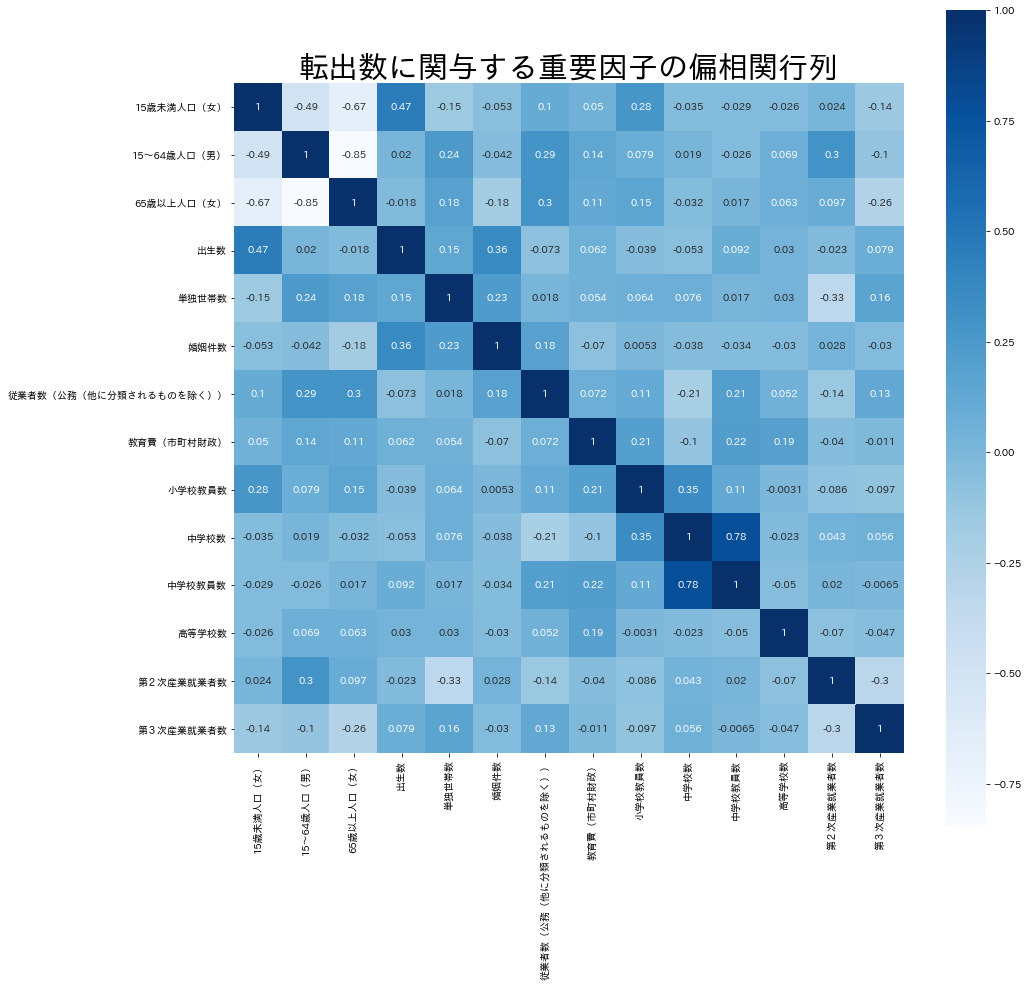

In [98]:
partial_corr = df_partial_corr(rural_data[trans_important_features])
plt.figure(figsize=(15,15))
plt.title("転出数に関与する重要因子の偏相関行列", fontsize=30)
sns.heatmap(partial_corr, annot=True,square=True, cmap='Blues');

<h1>課題２ 特殊出生率が低い地域の出生数に関する回帰分析</h1>

In [351]:
low_barthrate_data.head()

,地域コード,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,15歳未満人口（男）,15歳未満人口（女）,15～64歳人口,15～64歳人口（男）,15～64歳人口（女）,65歳以上人口,65歳以上人口（男）,65歳以上人口（女）,75歳以上人口,75歳以上人口（男）,75歳以上人口（女）,外国人人口,出生数,死亡数,転入者数（日本人移動者）,転出者数（日本人移動者）,世帯数,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,65歳以上の世帯員のいる核家族世帯数,高齢夫婦のみの世帯数,高齢単身世帯数（65歳以上の者１人）,婚姻件数,離婚件数,総面積（北方地域及び竹島を除く）,可住地面積,事業所数,事業所数（農業，林業）,事業所数（建設業）,事業所数（製造業）,事業所数（電気・ガス・熱供給・水道業）,事業所数（情報通信業）,事業所数（運輸業，郵便業）,事業所数（卸売業，小売業）,事業所数（金融業，保険業）,事業所数（不動産業，物品賃貸業）,事業所数（学術研究，専門・技術サービス業）,事業所数（宿泊業，飲食サービス業）,事業所数（生活関連サービス業，娯楽業）,事業所数（教育，学習支援業）,事業所数（医療，福祉）,事業所数（複合サービス事業）,事業所数（サービス業（他に分類されないもの））,事業所数（公務（他に分類されるものを除く））,第１次産業事業所数,第２次産業事業所数,第３次産業事業所数,従業者数,従業者数（農業，林業）,従業者数（建設業）,従業者数（製造業）,従業者数（電気・ガス・熱供給・水道業）,従業者数（情報通信業）,従業者数（運輸業，郵便業）,従業者数（卸売業，小売業）,従業者数（金融業，保険業）,従業者数（不動産業，物品賃貸業）,従業者数（学術研究，専門・技術サービス業）,従業者数（宿泊業，飲食サービス業）,従業者数（生活関連サービス業，娯楽業）,従業者数（教育，学習支援業）,従業者数（医療，福祉）,従業者数（複合サービス事業）,従業者数（サービス業（他に分類されないもの））,従業者数（公務（他に分類されるものを除く））,第１次産業従業者数,第２次産業従業者数,第３次産業従業者数,農家数（販売農家）,農家数（自給的農家）,経常収支比率（市町村財政）,実質公債費比率（市町村財政）,歳入決算総額（市町村財政）,地方税（市町村財政）,歳出決算総額（市町村財政）,民生費（市町村財政）,土木費（市町村財政）,教育費（市町村財政）,災害復旧費（市町村財政）,幼稚園数,幼稚園在園者数,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,高等学校数,高等学校生徒数,就業者数,就業者数（男）,就業者数（女）,完全失業者数,完全失業者数（男）,完全失業者数（女）,非労働力人口,非労働力人口（男）,非労働力人口（女）,第１次産業就業者数,第２次産業就業者数,第３次産業就業者数,公民館数,図書館数,総人口（非水洗化人口＋水洗化人口）,非水洗化人口,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,46641.800983,53358.199017,99253.670949,46279.213422,52974.457527,11320.322728,5774.715267,5545.607461,63283.335621,30225.583859,33057.751762,24766.692140,10311.285442,14455.406698,11539.852363,4305.208681,7234.643682,451.761871,678.564770,990.751687,6014.989070,5608.813147,47216.644915,47143.809838,97317.292543,25284.528027,19219.957836,9129.789854,5053.381658,5360.190457,505.952808,206.109951,5743.112424,2248.462883,3923.669659,5.275677,343.226338,133.735856,3.482971,74.730223,86.920623,951.926800,72.732637,451.864312,212.000270,520.806656,329.192012,129.382141,334.160368,15.519711,243.090912,15.058729,5.378118,477.423175,3440.868366,46755.868295,68.174042,3160.591613,1955.073767,224.856532,1636.586770,2430.601796,10008.369375,1275.945575,1751.012623,1585.827585,4471.725444,2158.212949,2398.435531,6594.186716,398.748999,5111.311667,1523.134101,68.891124,5118.021508,41568.955662,23.612497,17.722178,4.794208,0.143416,5.023407e+07,1.497677e+07,4.950600e+07,2.073193e+07,6.604949e+06,8.302873e+06,0.000000,5.787879,1003.812829,10.500134,254.410569,4632.864088,5.480558,152.379996,2299.734270,2.663449,2271.358297,43245.852703,23590.523450,19655.329253,2490.273290,1491.223937,999.049354,33346.992044,11041.531360,22305.460684,194.124432,6069.743428,33081.466700,0.051220,0.563422,99963.326361,335.440872,573.512208,435.473858,18.183159,9.117190,69.198445,62.949585,338.770183,108.228212,276.486460,14.700188,1363.122299
1,R01202,北海道,函館市,265979,45257.708315,54742.291685,99457.851936,45048.293286,54409.558649,10200.429357,5230.488121,4969.941236,57205.268085,27153.647468,30051.620617,32307.437805,12722.432974,19585.004831,16048.635419,5620.368525,10428.266893,289.872509,533.124796,1414.021408,3101.372665,3605.547806,46601.423421,46489.008531,95928.249975,25073.408051,18139.401983,11106.139958,6112.512642,7575.034119,400.407551,190.616552,25485.846627,4637.208201,5186.499686,9.023269,460.186706,230.093353,6.391482,37.596953,103.391621,1349.730618,104.519530,366.946263,165.426594,833.148482,514.702289,185.728949,389.128465,39.100831,350.403603,32.333380,16.542659,691.407968,4478.549058,46701.055346,75.569876,3281.462070,3683.749469,234.980957,477.481305,2593.061858,9325.548258,1174.528816,1193.327293,1081.664342,4919.185349,2423.499600,2105.053406,7879.193470,512.070502,3845.040398,1776.456036,185.352979,6974.610778,39541.091590,79.705541,59.027216,34.326018,2.970159,5.313630e+07,1.210950e+07,5.274703e+07,2.286240e+07,5.090858e+06,5.568946e+06,0.000000,7.143421,713.590171,18.046538,294.008174,4006.707296,9.399238,176.329710,2224.611717,5.639543,2620.131665,44035.431369,23549.227571,20486.2

In [388]:
"""
# 人口に対する特徴量
pop_features = ['日本人人口（男）', '日本人人口（女）','15歳未満人口（男）', '15歳未満人口（女）', '15～64歳人口（男）',
       '15～64歳人口（女）', '65歳以上人口（男）', '65歳以上人口（女）', '75歳以上人口（男）', '75歳以上人口（女）',
       '外国人人口',]
"""

"\n# 人口に対する特徴量\npop_features = ['日本人人口（男）', '日本人人口（女）','15歳未満人口（男）', '15歳未満人口（女）', '15～64歳人口（男）',\n       '15～64歳人口（女）', '65歳以上人口（男）', '65歳以上人口（女）', '75歳以上人口（男）', '75歳以上人口（女）',\n       '外国人人口',]\n"

In [389]:
# 特徴量の絞り込み
print("before data:",low_barthrate_data.shape)
low_barthrate_data = low_barthrate_data.drop(drop_columns, axis=1)
#city_data = city_data.drop(pop_features, axis=1)
print("after data:",low_barthrate_data.shape)

before data: (589, 128)
after data: (589, 110)


In [390]:
X = low_barthrate_data.drop(["出生数",'15歳未満人口（男）', '15歳未満人口（女）'], axis=1)
y = low_barthrate_data["出生数"]
X_norm = std.fit_transform(X)
y_norm = std.fit_transform(y.values.reshape(-1,1)).reshape(-1,)

<h3>Lassoによる回気分析</h3>

In [391]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, random_state=0, test_size=0.2)

lasso_cv = LassoCV(alphas=10 ** np.arange(-2, 1, 0.1),max_iter=10000, tol=0.1, cv=3)

lasso_cv.fit(X_train,y_train)

print("lasso")
print(f"training dataに対しての精度: {lasso_cv.score(X_train, y_train):.3}")
print(f"test set scoreに対しての精度: {lasso_cv.score(X_test, y_test):.3f}")
print("alpha:{}".format(lasso_cv.alpha_))

lasso
training dataに対しての精度: 0.726
test set scoreに対しての精度: 0.721
alpha:0.039810717055349776


<h3>重要因子の絞り込み</h3>

In [392]:
# 特徴量の名前の取得
feature_names = X.columns
used_features = [feature_names[i] for i in np.where(lasso_cv.coef_!=0)]
barth_important_features = feature_names[np.where(lasso_cv.coef_!=0)]
print("因子数:{}\n{}".format(len(barth_important_features),barth_important_features.values))

因子数:20
['65歳以上人口（男）' '転入者数（日本人移動者）' '核家族世帯数' '婚姻件数' '事業所数（電気・ガス・熱供給・水道業）'
 '従業者数（建設業）' '従業者数（生活関連サービス業，娯楽業）' '農家数（販売農家）' '経常収支比率（市町村財政）'
 '民生費（市町村財政）' '幼稚園在園者数' '小学校児童数' '中学校数' '中学校教員数' '完全失業者数（女）' '第２次産業就業者数'
 '図書館数' '非水洗化人口' '一般病院数' '保育所等在所児数']


In [393]:
# 特徴量をデータフレーム化
features = pd.DataFrame({"features":feature_names[np.where(lasso_cv.coef_!=0)], "coef":lasso_cv.coef_[np.where(lasso_cv.coef_!=0)]})

In [394]:
# 重み係数の絶対値が高い順にソート
features["abs_coef"] = np.abs(features["coef"])
features.sort_values("abs_coef" ,ascending=False)[:30].reset_index(drop=True)

,features,coef,abs_coef
0,婚姻件数,0.287838,0.287838
1,65歳以上人口（男）,-0.252638,0.252638
2,小学校児童数,0.249220,0.249220
3,転入者数（日本人移動者）,0.137519,0.137519
4,図書館数,-0.098049,0.098049
5,保育所等在所児数,0.077735,0.077735
6,完全失業者数（女）,-0.069479,0.069479
7,従業者数（生活関連サービス業，娯楽業）,-0.059035,0.059035
8,幼稚園在園者数,0.053859,0.053859
9,経常収支比率（市町村財政）,-0.031534,0.031534


<h3>偏相関行列を求める</h3>

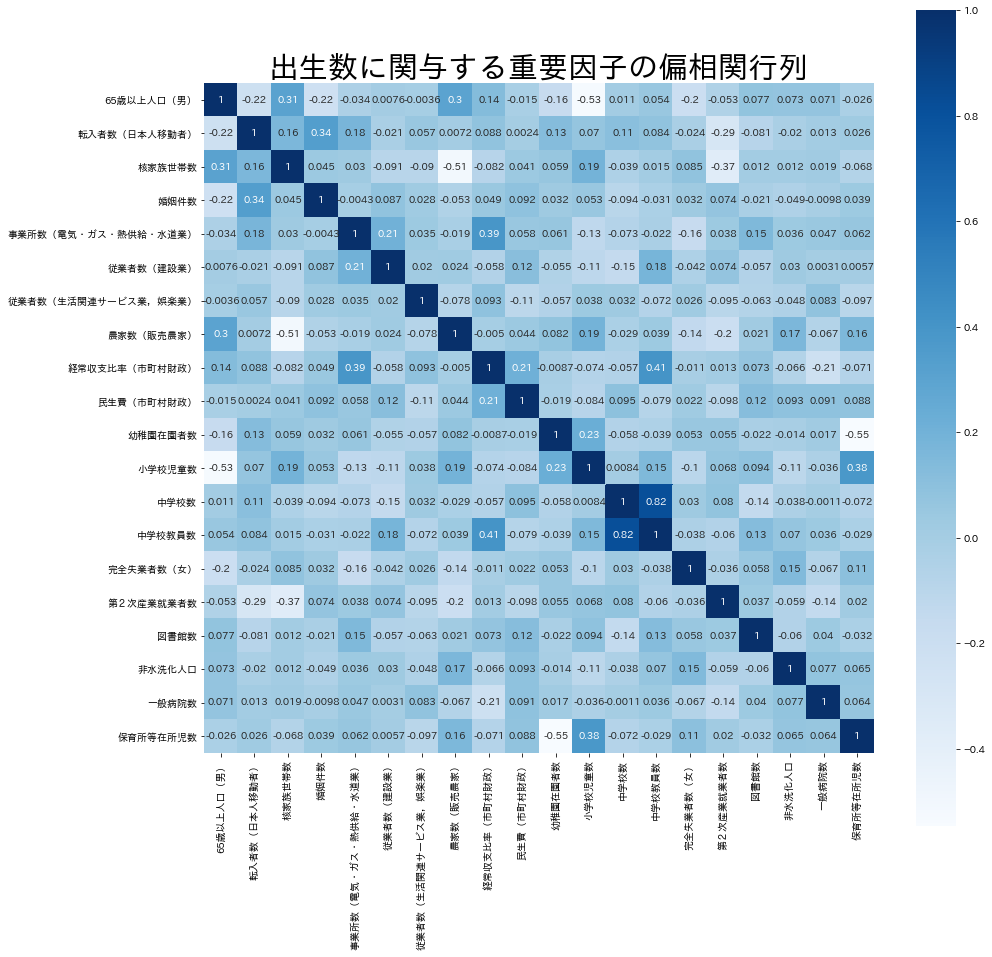

In [395]:
partial_corr = df_partial_corr(rural_data[barth_important_features])
plt.figure(figsize=(15,15))
plt.title("出生数に関与する重要因子の偏相関行列", fontsize=30)
sns.heatmap(partial_corr, annot=True,square=True, cmap='Blues');